In [1]:
import numpy as np
from numpy.typing import NDArray

def cubic_float(
    x: NDArray[np.float64],  # shape (n,)
    a: NDArray[np.float64],  # shape (n, 3)
) -> NDArray[np.float64]:
    """
    Evaluate a monic cubic polynomial at points x:

        y = a[:,0] + a[:,1] * x + a[:,2] * x**2 +  x**3
    """
    y = a[:,0] + a[:,1] * x + a[:,2] * x**2 + x**3
    return y

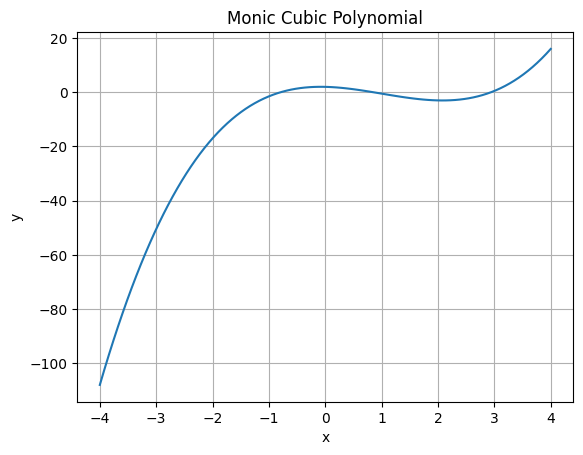

In [2]:
nplot = 100
xplot = np.linspace(-4.0, 4.0, nplot)
aplot = np.array([2.0, -0.5, -3.0])
aplot = aplot[None,:].repeat(nplot, axis=0)

yplot = cubic_float(xplot, aplot)
import matplotlib.pyplot as plt
plt.plot(xplot, yplot)
plt.title("Monic Cubic Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [3]:
print("hello")

hello


In [4]:
import sys
if "google.colab" in sys.modules:
    !pip install git+https://github.com/sdrangan/hwdesign.git

In [5]:
from xilinxutils.fixputils import truncate, saturate

ModuleNotFoundError: No module named 'xilinxutils'

In [6]:
# 强制在本地安装
import sys
try:
    from xilinxutils.fixputils import truncate, saturate
except ImportError:
    !pip install git+https://github.com/sdrangan/hwdesign.git
    from xilinxutils.fixputils import truncate, saturate

In [7]:
import sys
if "google.colab" in sys.modules:
    !pip install git+https://github.com/sdrangan/hwdesign.git

from xilinxutils.fixputils import truncate, saturate

In [8]:
import sys
if "google.colab" in sys.modules:
    !pip install git+https://github.com/sdrangan/hwdesign.git

from xilinxutils.fixputils import truncate, saturate

In [9]:
def cubic_fixed(
        xint : NDArray[np.int64],  
        aint : NDArray[np.int64],  
        wid : int = 16,   
        fbits : int = 8
    ) -> NDArray[np.int64]:
    
    # --- 开始填写 ---
    
    # 1. 计算 x^2: (x*x) >> fbits
    x2int = saturate((xint * xint) >> fbits, wid)
    
    # 2. 计算 x^3: (x*x^2) >> fbits
    x3int = saturate((xint * x2int) >> fbits, wid)
    
    # 3. 计算 a2 * x^2
    a2x2 = saturate((aint[:,2] * x2int) >> fbits, wid)
    
    # 4. 计算 a1 * x
    a1x1 = saturate((aint[:,1] * xint) >> fbits, wid)
    
    # 5. 把所有项加起来 (每一项都在 Q(wid, fbits) 格式)
    # y = a0 + a1*x + a2*x^2 + x^3
    yint = saturate(aint[:,0] + a1x1 + a2x2 + x3int, wid)
    
    # --- 填写结束 ---

    return yint

In [10]:
import numpy as np
from numpy.typing import NDArray

In [11]:
from xilinxutils.fixputils import truncate, saturate

In [12]:
def cubic_fixed(
        xint : NDArray[np.int64],  
        aint : NDArray[np.int64],  
        wid : int = 16,   
        fbits : int = 8
    ) -> NDArray[np.int64]:
    
    # --- 开始填写 ---
    
    # 1. 计算 x^2: (x*x) >> fbits
    x2int = saturate((xint * xint) >> fbits, wid)
    
    # 2. 计算 x^3: (x*x^2) >> fbits
    x3int = saturate((xint * x2int) >> fbits, wid)
    
    # 3. 计算 a2 * x^2
    a2x2 = saturate((aint[:,2] * x2int) >> fbits, wid)
    
    # 4. 计算 a1 * x
    a1x1 = saturate((aint[:,1] * xint) >> fbits, wid)
    
    # 5. 把所有项加起来 (每一项都在 Q(wid, fbits) 格式)
    # y = a0 + a1*x + a2*x^2 + x^3
    yint = saturate(aint[:,0] + a1x1 + a2x2 + x3int, wid)
    
    # --- 填写结束 ---

    return yint

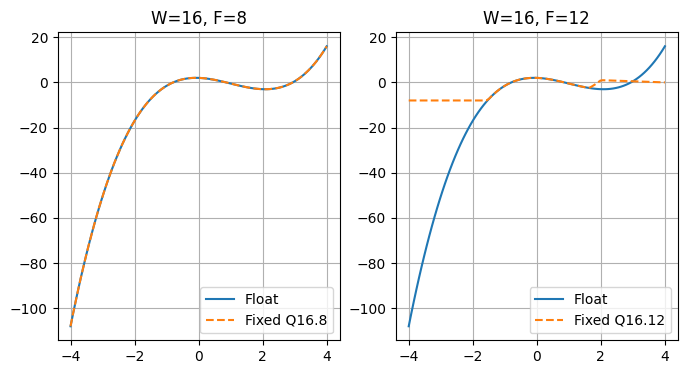

In [13]:
# Bit widths to test
wid_plot = [16, 16]
fbits_plot = [8, 12]
nwid = len(wid_plot)


plt.subplots(1, nwid,figsize=(4*nwid, 4))

for i in range(nwid):
    w = wid_plot[i]
    f = fbits_plot[i]
    
    # 1. 转换输入为定点整数
    xplot_int = np.round(xplot * (2**f)).astype(np.int64)
    aplot_int = np.round(aplot * (2**f)).astype(np.int64)
    
    # 2. 调用你写的函数
    yplot_int = cubic_fixed(xplot_int, aplot_int, wid=w, fbits=f)
    
    # 3. 转回浮点数用于绘图比较
    yplot_fix = yplot_int.astype(np.float64) / (2**f)
    
    # 4. 绘图
    plt.subplot(1, nwid, i+1)
    plt.plot(xplot, yplot, label='Float')
    plt.plot(xplot, yplot_fix, '--', label=f'Fixed Q{w}.{f}')
    plt.title(f"W={w}, F={f}")
    plt.legend()
    plt.grid(True)
    

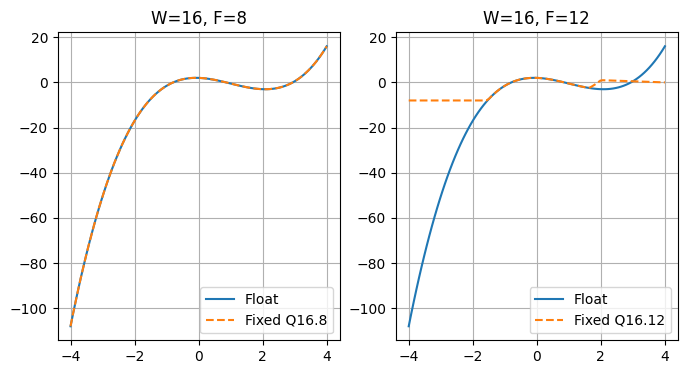

In [14]:
import matplotlib.pyplot as plt
# Bit widths to test
wid_plot = [16, 16]
fbits_plot = [8, 12]
nwid = len(wid_plot)


plt.subplots(1, nwid,figsize=(4*nwid, 4))

for i in range(nwid):
    w = wid_plot[i]
    f = fbits_plot[i]
    
    # 1. 转换输入为定点整数
    xplot_int = np.round(xplot * (2**f)).astype(np.int64)
    aplot_int = np.round(aplot * (2**f)).astype(np.int64)
    
    # 2. 调用你写的函数
    yplot_int = cubic_fixed(xplot_int, aplot_int, wid=w, fbits=f)
    
    # 3. 转回浮点数用于绘图比较
    yplot_fix = yplot_int.astype(np.float64) / (2**f)
    
    # 4. 绘图
    plt.subplot(1, nwid, i+1)
    plt.plot(xplot, yplot, label='Float')
    plt.plot(xplot, yplot_fix, '--', label=f'Fixed Q{w}.{f}')
    plt.title(f"W={w}, F={f}")
    plt.legend()
    plt.grid(True)
    

In [15]:
import os
import pandas as pd

# Create test_vectors directory if it doesn't exist
os.makedirs('test_outputs', exist_ok=True)

# Generate random samples
nsamp = 100
deg = 3
a = np.random.uniform(-4.0, 4.0, (nsamp, deg))
x = np.random.uniform(-2.0, 2.0, nsamp)

# Fix parameters for test vector generation
wid_acc = 32 
wid = 16
fbits_test = [8, 12]

for fbits in fbits_test:
    print(f'\nGenerating test vectors for W={wid}, F={fbits}')

    # TODO: Generate test vectors
    #   y = floating point output
    #   xint = fixed point input x
    #   aint = fixed point input a
    #   yint = fixed point output
    #   yfix = fixed point output back converted to float

    # Compute floating point output
    y = cubic_float(x, a)

    # Convert to fixed point representation of inputs
    xint = np.round(x * (2**fbits)).astype(np.int64)
    aint = np.round(a * (2**fbits)).astype(np.int64)

    # Compute fixed point outputs
    yint = cubic_fixed(
        xint=xint, 
        aint=aint, 
        wid=wid, 
        fbits=fbits)
    yfix = yint.astype(np.float64) / (2**fbits)

    mse = np.mean((y - yfix)**2)/ np.mean(y**2)
    print("Mean squared error: %12.4e" % mse)

    # Create DataFrame with all values
    df = pd.DataFrame({
        'xint': xint,
        'aint0': aint[:, 0],
        'aint1': aint[:, 1],
        'aint2': aint[:, 2],
        'y': y,
        'yint': yint,
        'yfix': yfix
    })

    # Save to CSV file
    csv_filename = f'test_outputs/tv_w{wid}_f{fbits}.csv'
    df.to_csv(csv_filename, index=False)
    print(f"Test vectors saved to {csv_filename}")
    print(f"Number of test vectors: {len(df)}")
    print(f"\nFirst 5 rows:")
    print(df.head())



Generating test vectors for W=16, F=8
Mean squared error:   4.3743e-06
Test vectors saved to test_outputs/tv_w16_f8.csv
Number of test vectors: 100

First 5 rows:
   xint  aint0  aint1  aint2          y  yint       yfix
0   158    298   -222   -299   0.418284   105   0.410156
1     2     42   -191    366   0.158594    40   0.156250
2   365    107    500    656  11.298940  2892  11.296875
3   231   -703   -497    376  -2.571013  -660  -2.578125
4   -62    763    692   -337   2.237898   571   2.230469

Generating test vectors for W=16, F=12
Mean squared error:   1.4648e-01
Test vectors saved to test_outputs/tv_w16_f12.csv
Number of test vectors: 100

First 5 rows:
   xint  aint0  aint1  aint2          y   yint      yfix
0  2534   4770  -3545  -4791   0.418284   1712  0.417969
1    30    671  -3062   5851   0.158594    648  0.158203
2  5837   1709   8002  10497  11.298940  32767  7.999756
3  3695 -11252  -7959   6015  -2.571013 -10532 -2.571289
4  -988  12206  11066  -5396   2.237898   9